In [1]:
# Pareto lib

import numpy as np
import matplotlib.pyplot as plt
import itertools

def _dominates(p_0, p_1):
    global n
    n = n+1
    return np.greater_equal(p_0, p_1).all()

def _add_point_to_front(f, p):
    # if any point in frontier dominates p ignore it
    for p_0 in f:
        if _dominates(p_0[1], p[1]):
            return f
    # o/w eliminate all points in frontier dominated by p
    f_0 = [p_0 for p_0 in f if not _dominates(p[1], p_0[1])]
    # then add p to frontier
    f_0.append(p)
    return f_0

def _get_pareto_front(s):
    f = []
    for p in s:
        f = _add_point_to_front(f, p)
    return f

# Berechnet die Pareto Front von s relativ zu einem Punkt sp. Projektion auf die i0-te und i1-te Koordinate
# 
# s = [[[10,9],[0,1]], Bewertung der beiden Optionen des ersten Themas durch die beiden Parteien
#      [[10,7,4],[0,1,4]] Bewertung der drei Optionen des zweiten Themas durch die beiden Parteien
#     ]
#
# sp = [10,20] 
#                                                              
def get_pareto_front_with_security_point(s,sp,i0,i1):
    i0 = i0-1
    i1 = i1-1
    l = []
    i = []
    global n
    n = 0
    for p in list(s):
        l.append([list(a) for a in zip(*list(p[:]))])
        i.append([a for a in range(len(p[0]))])
    k = np.array([t for t in itertools.product(*i)]) #keys
    k = [tuple(e) for e in k]
    v = np.array([np.array(t).sum(axis = 0) for t in itertools.product(*l)])
    c = [list(a) for a in zip(k,v.tolist())]
    d = dict(c)
    print(d[(0,0,1,0,2,2,2,0,2,0,1,0,0,1,1,1,2,1)])
    print("Anzahl Punkte: " + str(len(c)))
    if sp is not None:
        c = [a for a in c if _dominates(a[1], sp)]   # add security point
        print("\nAnzahl Punkte mindestens so gut wie der Security Point: " + str(len(c)))
        print("\nZum Beispiel:\n")
        for e in c[:10]:
            print(e[0],": ",e[1])
    f = np.array(_get_pareto_front(c), dtype=object, ndmin=2)
    print("\n" + str(n) + " Vergleiche\n")
    if (len(f) == 1):
        print("Die Pareto Front besteht aus dem Punkt:\n")
    else:
        print("Die Pareto Front besteht aus den folgenden", str(len(f)), "Punkten:\n")
    for e in f:
        print(e[0],": ",e[1])
    f_x = list(np.array(list(f[:,1]))[:,i0])
    f_y = list(np.array(list(f[:,1]))[:,i1])
    
    fig = plt.figure(figsize=(8,8))
    plt.scatter(v[:,i0], v[:,i1], color = "grey", marker = ".")
    plt.scatter(f_x, f_y, color = "red", marker = "o")
    if sp is not None:
        plt.scatter(sp[i0],sp[i1], color = "blue", marker = "*")
    plt.show()

# Berechnet die Pareto Front von s. Projektion auf die i0-te und i1-te Koordinate
# 
# s = [[[10,9],[0,1]], Bewertung der beiden Optionen des ersten Themas durch die beiden Parteien
#      [[10,7,4],[0,1,4]] Bewertung der drei Optionen des zweiten Themas durch die beiden Parteien
#     ]
# 
def get_pareto_front(s,i0,i1):
    get_pareto_front_with_security_point(s,None,i0,i1)
    
def pick(a,l):
    return [[a[i][j-1] for j in l] for i in range(len(a))]

In [2]:
a = [[[5,3,1],[4,3,0],[0,1,3],[0,2,3],[5,3,1],[4,3,2],[3,2,1],[-2,-1,0],[-1,0,1],[3,3,1],[4,3,1],[4,3,0],[3,2,1],[0,1,0]], # 1.1.a)
     [[-3,3],[4,-2],[-2,0],[1,0],[-3,3],[-3,3],[-2,3],[0,1],[0,0],[3,-1],[3,0],[-4,4],[-3,2],[-1,1]], # 1.2.a)
     [[-1,3],[-5,3],[5,-1],[-1,1],[-2,3],[-1,2],[-2,3],[0,1],[0,0],[-4,4],[-2,2],[-5,4],[-3,3],[-1,1]], # 1.2.b)
     [[-1,0],[5,3],[1,0],[-3,1],[3,1],[3,2],[3,2],[-2,3],[0,3],[2,2],[3,2],[3,1],[3,1],[2,-2]], # 2.1.a)
     [[-1,0,0],[3,2,-1],[2,1,0],[-3,0,3],[3,2,1],[3,2,1],[3,2,0],[-3,-1,0],[-2,0,0],[-1,1,1],[3,2,0],[3,2,0],[2,1,0],[-1,1,-1]], # 2.1.b)
     [[-2,-1,0],[-3,-2,1],[0,1,2],[-3,-2,-1],[1,2,2],[2,3,2],[3,2,1],[-3,-2,-1],[-3,0,0],[0,0,0],[5,4,2],[-2,-1,0],[-2,-1,0],[-3,-1,0]], # 2.1.c)
     [[3,1,-2],[4,2,-3],[-5,-3,1],[-3,0,3],[3,1,-2],[4,2,-2],[-1,3,1],[3,1,-2],[0,0,0],[4,3,-2],[3,2,-3],[5,3,-3],[3,3,0],[1,1,0]], # 2.2.a)
     [[5,3],[5,2],[2,3],[-4,-2],[5,3],[4,3],[4,3],[-3,-1],[0,0],[5,3],[4,2],[5,2],[3,2],[1,0]], # 3.1.a)
     [[5,-5,-2],[3,-3,-2],[2,-2,-1],[-2,3,3],[5,-5,-2],[4,-4,-2],[4,-4,-1],[-2,0,2],[0,0,0],[5,-5,-3],[4,-4,-3],[4,-4,-3],[2,-3,-1],[-3,3,3]], # 3.1.b)
     [[3,2],[3,2],[3,1],[-3,-4],[4,3],[4,3],[4,4],[-4,-4],[-3,-2],[4,2],[4,3],[4,4],[2,3],[-4,-4]], # 3.2.a)
     [[-3,-2],[-5,-3],[3,2],[5,3],[0,1],[-4,-2],[0,1],[-3,2],[0,3],[-5,-4],[-4,-2],[-4,-1],[3,2],[-3,-1]], # 3.3.a)
     [[0,0],[-2,0],[3,1],[4,2],[0,0],[-2,-1],[1,1],[-2,3],[0,2],[-2,0],[0,0],[-2,0],[-2,0],[-3,0]], # 3.3.b)
     [[-2,0],[-4,2],[2,0],[2,0],[1,2],[2,3],[2,2],[4,-4],[5,3],[-3,3],[1,3],[-2,3],[-2,3],[1,0]], # 4.1.a)
     [[-4,4],[-3,3],[0,0],[2,0],[-2,2],[-3,3],[0,2],[4,2],[3,5],[-3,3],[-3,3],[-3,3],[1,0],[1,0]], # 4.1.b)
     [[3,-3],[2,-2],[-3,3],[-3,4],[2,-1],[3,-2],[1,0],[-3,4],[5,3],[2,-2],[2,-2],[2,-2],[-1,2],[0,2]], # 4.1.c)
     [[-5,-3],[-3,-2],[-2,-1],[3,0],[-4,-2],[-4,-2],[-3,-1],[4,1],[2,5],[-3,-2],[-4,-2],[-3,-2],[-1,0],[1,1]], # 4.2.a)
     [[-5,-3,-1],[-4,-3,-1],[2,-2,-2],[2,4,3],[-5,-3,-1],[-4,-3,-1],[0,-2,-1],[3,4,4],[0,3,5],[-3,-3,-1],[-4,-3,-2],[-4,-3,-2],[-2,-1,0],[-1,1,2]], # 4.2.b)
     [[-3,-1],[-2,-1],[2,3],[2,3],[-2,-1],[-2,-1],[0,0],[3,4],[-2,-1],[-2,-1],[-3,-1],[-3,-1],[2,3],[1,2]] # 4.2.c)
    ]

In [3]:
b = pick(a,[1,2]) # USA und EU

[0, 7]
Anzahl Punkte: 2985984

2995157 Vergleiche

Die Pareto Front besteht aus den folgenden 6 Punkten:

(0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [19, 35]
(0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [20, 34]
(0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [21, 32]
(0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [25, 29]
(0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [26, 28]
(0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [27, 26]


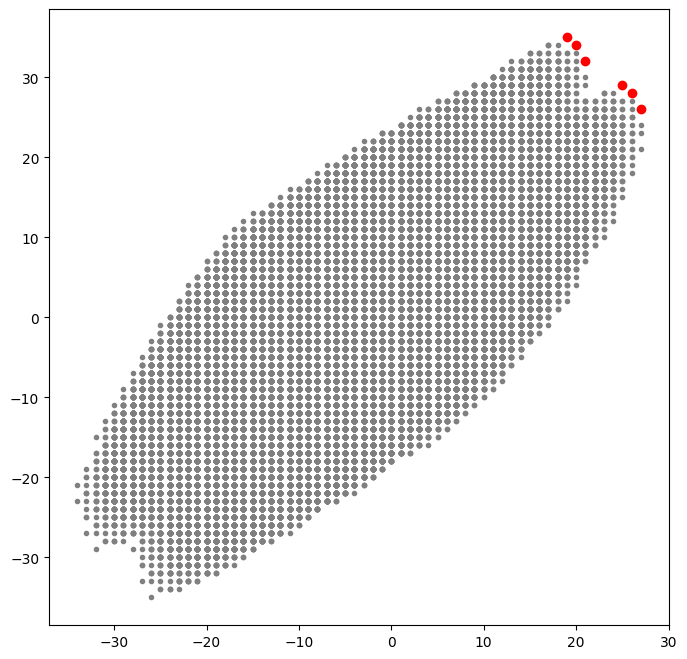

In [4]:
get_pareto_front(b,1,2)

[0, 15]
Anzahl Punkte: 2985984

5896197 Vergleiche

Die Pareto Front besteht aus den folgenden 29 Punkten:

(0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1) :  [20, 15]
(0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1) :  [19, 16]
(0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1) :  [21, 14]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1) :  [9, 27]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1) :  [13, 23]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1) :  [3, 33]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1) :  [7, 29]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1) :  [11, 25]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1) :  [15, 21]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1) :  [5, 31]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1) :  [10, 26]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1) :  [14, 22]
(0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1) :  [4, 32]
(0, 1, 0, 0, 0, 2, 2, 0, 0

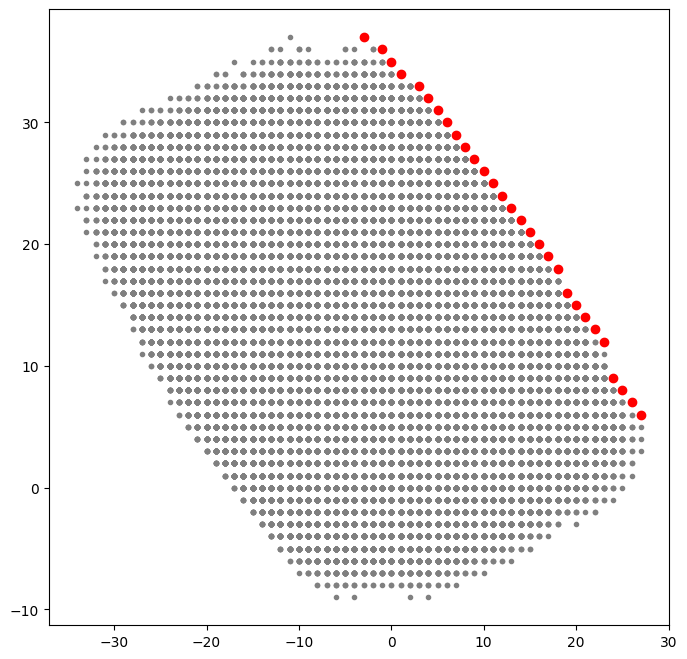

In [5]:
b = pick(a,[1,3]) # USA und China
get_pareto_front(b,1,2)

[7, 5]
Anzahl Punkte: 2985984

2986266 Vergleiche

Die Pareto Front besteht aus den folgenden 2 Punkten:

(0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [35, 29]
(0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1) :  [34, 31]


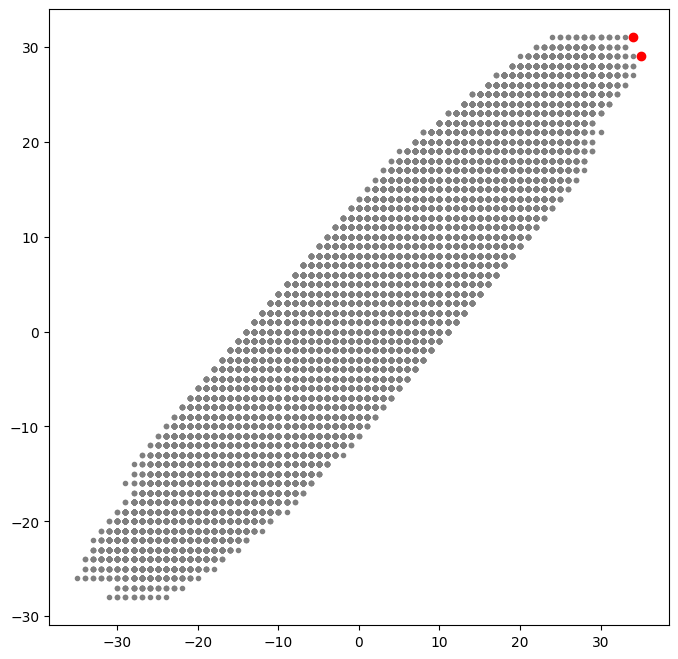

In [6]:
b = pick(a,[2,10]) # EU and CH
get_pareto_front(b,1,2)

[0, 7, 15, 19, 15, 8, 8, 21, 5, 11, 1, 5]
Anzahl Punkte: 2985984

Anzahl Punkte mindestens so gut wie der Security Point: 1

Zum Beispiel:

(0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1) :  [0, 7, 15, 19, 15, 8, 8, 21, 5, 11, 1, 5]

2985984 Vergleiche

Die Pareto Front besteht aus dem Punkt:

(0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1) :  [0, 7, 15, 19, 15, 8, 8, 21, 5, 11, 1, 5]


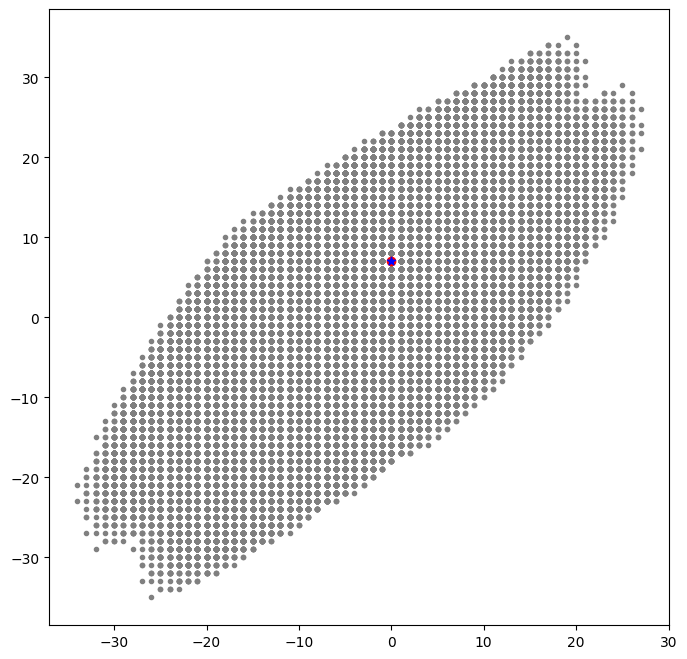

In [7]:
b = pick(a,[1,2,3,4,5,6,8,9,10,11,12,14]) # without Singapore and Mexico
get_pareto_front_with_security_point(b,[0, 7, 15, 19, 15, 8, 8, 21, 5, 11, 1, 5],1,2)